<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Algorithms/blob/main/Dyanmic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms

Quiz 4

1. Consider an imaginary currency that is available in the fol-
lowing denominations: 1, 4, 7, 13, 28, 52, 91, 365. Given an integer k, your
goal is to express k using the minimum possible number of bills of the
given denominations.
(a) Consider the greedy algorithm that repeatedly takes the largest bill
that does not exceed the target amount. For example, to make 122
using the greedy algorithm, we first take a 91 bill, then a 28 bill, and
finally three 1 bills. Give an example where this greedy algorithm
uses more bills than the minimum possible.
(b) Describe and analyze a recursive algorithm that computes, given an
integer k, the minimum number of bills needed to make k. (Dont
worry about making your algorithm fast; just make sure it’s correct.)
(c) Describe a dynamic programming algorithm that computes, given an
integer k, the minimum number of bills needed to make k. (This one
needs to be fast.)


Minimum change problem  greedy algorithm (recursion implementation)

In [ ]:
def minchange(x):
  denominations=[1, 4, 7, 13, 28, 52, 91, 365]
  if x==0:
    return 0
  v=1000000000
  for c in denominations:
    if c<=x:
      v=min(minchange(x-c)+1,v)
  return(v)

Minimum change problem greedy algorithm

In [ ]:
def minchange_g(x):
  denominations=[1, 4, 7, 13, 28, 52, 91, 365]
  ans=[]
  i=len(denominations)-1
  while i>=0:
    while denominations[i]<=x:
      ans.append(denominations[i])
      x=x-denominations[i]
    i=i-1
  print(ans)
  return(len(ans))

In [ ]:
minchange(16)

4

Minimum change problem dynamic programming implementation

In [ ]:
def minchange_dp(x):
  denominations=[1, 4, 7, 13, 28, 52, 91, 365]
  ans=[]
  dp=[0 for i in range(x+1)]
  for i in range(1,x+1):
    dp[i]=100000000000
    for d in denominations:
      if d<=i:
        if dp[i-d]+1<dp[i]:
          dp[i]=dp[i-d]+1
  #print(dp)
  i=x
  while i>0:
    for c in denominations:
      if dp[i]==dp[i-c]+1:
        print
        i=i-c
        ans.append(c)
  print(ans)
  return dp[x]

In [ ]:
minchange(16)

4

Least number when greedy algo uses more coins

In [ ]:
for i in range(1000):
  if minchange_dp(i)!=minchange_g(i):
    print(i)

416
455
507
546
598
637
689
728
781
820
872
911
963


In [ ]:
minchange_dp(416),minchange_g(416)

[52, 91, 91, 91, 91]
[365, 28, 13, 7, 1, 1, 1]


(5, 7)

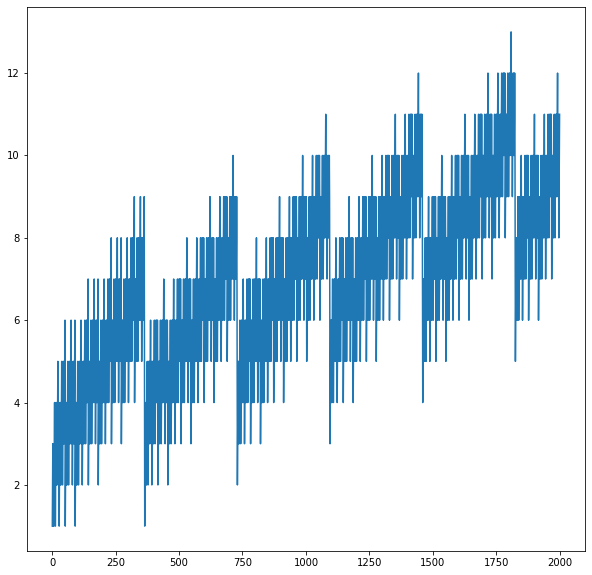

In [ ]:
x=[i for i in range(1,2000)]
y=[minchange(i) for i in x]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.show()

2.A subsequence is anything obtained from a sequence by ex-
tracting a subset of elements, but keeping them in the same order; the ele-
ments of the subsequence need not be contiguous in the original sequence.

For example, the strings C,DAMN,YAIOAI, and DYNAMICPROGRAM-
MING are all subsequences of the string DYNAMICPROGRAMMING.

(a) Let A[1 . . . m] and B[1 . . . n] be two arbitrary arrays. A common
supersequence of A and B is another sequence that contains both A
and B as subsequences. Describe an efficient algorithm to compute
the length ofthe shortest common supersequence of A and B.
(b) Call a sequence X[1 . . . n] of numbers bitonic if there is an index
i with 1 < i < n, such that the prefix X[1 . . . i] is increasing and
the suffix X[i . . . n] is decreasing. Describe an efficient algorithm to
compute the length of the longest bitonic subsequence of an arbitrary
array A of integers.

1

(c) Call a sequence X[1 . . . n] of numbers oscillating if X[i] < X[i +
1] forall even i, and X[i] > X[i + 1] for all odd i. Describe an
efficient algorithm to compute the length of the longest oscillating
subsequence of an arbitrary array A of integers.

In [ ]:
def supersequence(x,y):
  n=len(x)
  m=len(y)
  table=[[0 for i in range(m+1)] for j in range(n+1)]
  for i in range(1,n+1):
    for j in range(1,m+1):
      if (x[i-1]==y[j-1]):
        table[i][j]=table[i-1][j-1]+1
      else:
        table[i][j]=max(table[i-1][j],table[i][j-1])
  print(table)
  return (n+m-table[n][m])

In [ ]:
X ="YAIOAI"
Y ="DAMN"
supersequence(X,Y)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1]]


9

In [ ]:
def bitonic_seq(x):
  inc=[1 for i in range(len(x))]
  dec=[1 for i in range(len(x))]
  for i in range(0,len(x)):
    for j in range(0,i):
      if x[j]<x[i] and inc[i]<inc[j]+1:
        inc[i]=1+inc[j]
  for i in range(len(x)-1,-1,-1):
    for j in range(i,len(x)):
      if x[j]<x[i] and dec[i]<dec[j]+1:
        dec[i]=1+dec[j]
  max=0
  for i in range(len(x)):
    if inc[i]+dec[i]-1>max:
      max=inc[i]+dec[i]-1
  return (max)

In [ ]:
bitonic_seq([80, 60, 30, 40, 20, 10])

5

In [ ]:
def alternating_seq(x):
  inc=1
  dec=1
  for i in range(1,len(x)):
    if x[i]>x[i-1]:
      inc=dec+1
    elif x[i]<x[i-1]:
      dec=inc+1
  return max(inc,dec)

In [ ]:
alternating_seq([10, 22, 9, 33, 49, 50, 31, 60])

6

3. In the text segmentation problem we are given a string
A[1 . . . n] and a subroutine IsW ord() that takes an array of characters
as input and returns TRUE if and only if the input is a “word”. Our
goal is to know whether A can be partitioned into a sequence of words.

Describe efficient algorithms for the following variants of the text segmen-
tation problem. Analyze your algorithms by bounding the number of calls

to IsW ord().

(a) Given an array A[1 . . . n] of characters, compute the number of par-
titions of A into words. For example, given the string ARTISTOIL,

your algorithm should return 2, for the partitions ARTIST·OIL and
ART·IS·TOIL.
(b) Given two arrays A[1 . . . n] and B[1 . . . n] of characters, decide whether
A and B can be partitioned into words at the same indices. For

example, the strings BOTHEARTHANDSATURNSPIN and PIN-
STARTRAPSANDRAGSLAP can be partitioned into words at the

same indices as follows: BOT·HEART·HAND·SAT·URNS·PIN and
PIN·START·RAPS·AND·RAGS·LAP, respectively.

In [85]:
def wordBreak(dict, str, count):
    if not str:
      count+=1
      return count
    for i in range(1, len(str) + 1):
      prefix = str[:i]
      if prefix in dict:
        count=wordBreak(dict, str[i:],count)
    return count
dict = ["ARTIST","OIL","IS","TOIL","ART"]
str = "ARTISTOIL"
wordBreak(dict, str,0)

2

In [94]:
def wordBreak(dict, str,arr,array):
    if not str:
      array+=[arr]
      return ([],array)
    for i in range(1, len(str) + 1):
      prefix = str[:i]
      if prefix in dict:
        arr+=[i]
        arr,array=wordBreak(dict, str[i:],arr,array)
    return (arr,array)
dict = ["ARTIST","OIL","IS","TOIL","ART"]
str = "ARTISTOIL"
arr,array=wordBreak(dict, str,[],[])

In [98]:
def check(array,string):  
  for i in array:
    count=False
    str=string
    for j in i:
      prefix=str[:i]
      str=str[i:]
      if prefix in dict:
        count=True
      else:
        count=False 
        break
    if count==True:
      return True
  return False